In [1]:
#check model
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
import figure 
from EconModel import cpptools
import pickle

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 50
T = 20
#cpptools.setup_nlopt(folder='cppfuncs/', do_print = True) #install nlopt

#SOLVE THE MODEL

In [2]:
save_data = False
save_pickle = True
specs = {}

#JEG PRØVER AT KØRE MED 0.25 ved util Z


#specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'threads':threads,'bargaining':2}}})
specs.update({f'model_FC_highSigmaHK':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'threads':threads,'bargaining':0}}})
#specs.update({f'model_LC_highSigmaHK':{'latexname':'limited', 'par': { 'T':T, 'do_HK':False , 'threads':threads,'bargaining':1}}})

#specs.update({f'test':{'latexname':'limited', 'par':{ 'T': 10, 'sigma_HK': 1.0, 'num_A': 100, 'do_HK':False , 'threads':threads,'bargaining':1}}})
#specs.update({f'test2':{'latexname':'limited', 'par':{ 'T': 10, 'gamma3_m': 1.2, 'gamma3_w': 1.2, 'num_A': 100, 'do_HK':False , 'threads':threads,'bargaining':1}}})
#specs.update({f'test3':{'latexname':'limited', 'par':{ 'T': 10, 'sigma_HK': 1.0, 'gamma3_m': 1.2, 'gamma3_w': 1.2,  'num_A': 100, 'do_HK':False , 'threads':threads,'bargaining':1}}})

#specs.update({f'model_FC_doHK':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': True, 'threads':threads,'bargaining':0}}})
#specs.update({f'model_LC_doHK':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': True , 'threads':threads,'bargaining':1}}}) 
#specs.update({f'model_NC_doHK':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': True, 'threads':threads,'bargaining':2}}})

print(specs)



# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    print(f'{name} loading...',end='')
    
    # setup model
    models = LimitedCommitmentModelClass(name=name,par=spec['par'])
    models.spec = spec

    compile_now = True if do_compile & (m==0) else False
    models.link_to_cpp(force_compile=compile_now)
    
    print(' solving...')
    %time models.solve() 

    if save_pickle:
        pickle_file = f'output/{name}_sol.pickle'
        with open(pickle_file, 'wb') as f:
            pickle.dump(models.sol,f)
        pickle_file = f'output/{name}_par.pickle'
        with open(pickle_file, 'wb') as f:
            pickle.dump(models.par,f)

    #Save  data 
    if save_data: 
        T = models.par.T
        print(' saving...')
        models.sim.init_love[:] = 0.2
        models.sim.init_A[:] = 2.0 
        np.random.seed(models.par.seed)
        data1 = Estimate.create_data(models,start_p = 1, end_p = T-1, to_xl = True, name_xl = name)
        print(f'Couple {np.mean(models.sim.couple,0)}')
        print(f'HKw {np.mean(models.sim.Kw,0)}')
        print(f'HKm {np.mean(models.sim.Km,0)}')
        print(f'Laborw {np.mean(models.sim.labor_w,0)}')
        print(f'Laborm {np.mean(models.sim.labor_m,0)}')
        print(f'Asset {np.nanmean(models.sim.A,0)}')

        var_list = ('labor_w', 'labor_m', 'cons_w', 'cons_m', 'Vw', 'Vm')
        t_list = (1,9)
        i_A = 250
        i_HK = 1
        i_HKw = i_HK
        i_HKm = i_HK
        i_Z = 0
        i_Zw = i_Z
        i_Zm = i_Z
        i_P = 5
        i_L = 5
        figure.figure_single(models, var_list, t_list, i_A, i_Z, i_HK, model_name = name)
        figure.figure_couple(models, var_list, t_list, i_A, i_Zw, i_Zm, i_HKw, i_HKm, i_L, i_P, sol_type = 'couple', model_name = name)
        figure.figure_couple(models, var_list, t_list, i_A, i_Zw, i_Zm, i_HKw, i_HKm, i_L, i_P, sol_type = 'remain_couple', model_name = name)
# den tog 2.5 time før med LC 
# lc tager 1 time og 25 min
# nc tager nu 1 time og 40 min

{'model_FC_highSigmaHK': {'latexname': 'limited', 'par': {'T': 20, 'do_HK': False, 'threads': 50, 'bargaining': 0}}}
model_FC_highSigmaHK loading... solving...
CPU times: total: 2d 4h 16min 1s
Wall time: 2h 3min 57s


OSError: [Errno 28] No space left on device

In [ ]:

stop

NameError: name 'stop' is not defined

In [ ]:
name = 'model_FC'
model_name = "model_FC"

N = 50000
rest_sample = False
#name_error = "uni2std_Yerror"

specs = {}
#specs.update({f'model_LC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
#specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':2}}})
specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'simN': N,  'threads':threads,'bargaining':0}}})

# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    
    # setup model
    model = LimitedCommitmentModelClass(name=name,par=spec['par'])
    model.spec = spec

    compile_now = True if do_compile & (m==0) else False
    model.link_to_cpp(force_compile=compile_now)
    

# setup model
#model = LimitedCommitmentModelClass(name=name)    
#model.link_to_cpp(force_compile=True)


#load par and sol
pickle_file = f'output/{name}_sol.pickle'

with open(pickle_file, 'rb') as f:
    model.sol = pickle.load(f)

pickle_file = f'output/{name}_par.pickle'

with open(pickle_file, 'rb') as f:
    model.par = pickle.load(f)
    model.par.simN = N


"Check simulate"



In [ ]:
model.simulate()
sim = model.sim
soml= model.sol
par = model.par


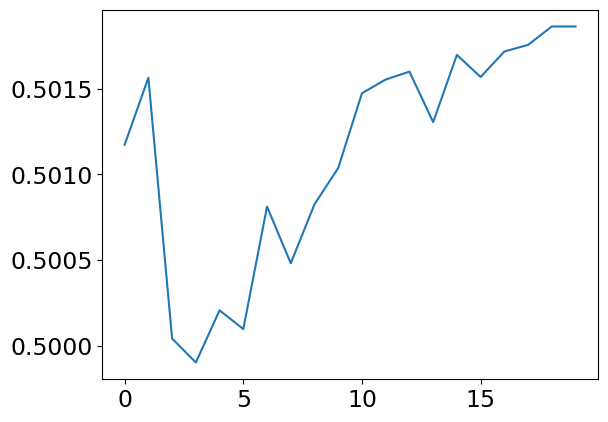

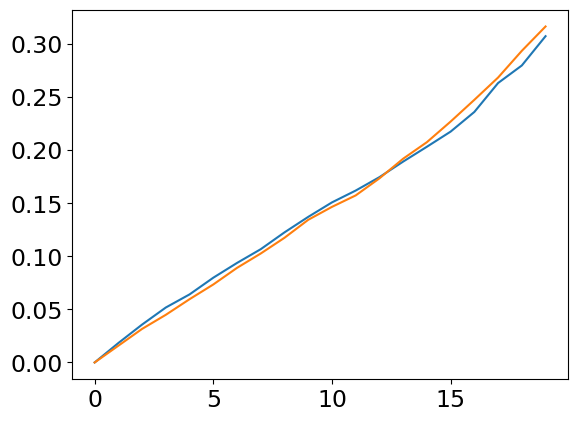

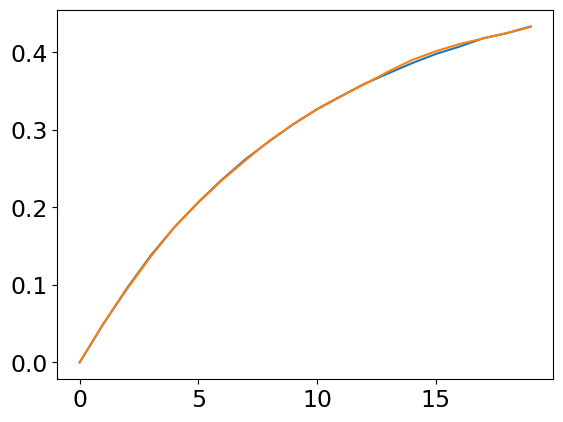

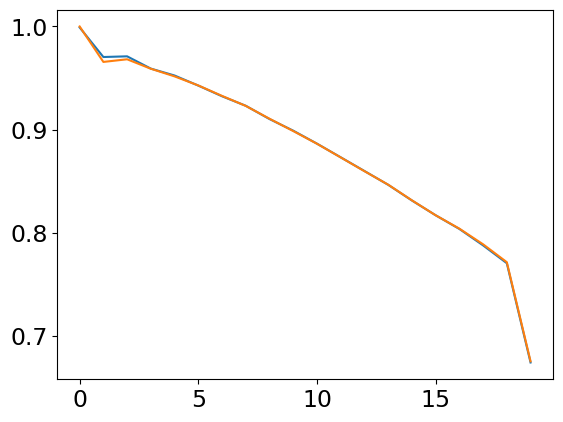

In [ ]:

# SIMULERING
nan = sim.couple
I = model.sim.couple<1
nan = np.zeros(I.shape)
nan[I] = np.nan

plt.plot(np.nanmean(sim.power+nan, axis=0))
plt.show()



plt.plot(np.nanmean(sim.Zm+nan, axis=0))
plt.plot(np.nanmean(sim.Zw+nan, axis=0))
plt.show()


plt.plot(np.nanmean(sim.Zm, axis=0))
plt.plot(np.nanmean(sim.Zw, axis=0))
plt.show()




plt.plot(np.nanmean(sim.labor_w, axis=0))
plt.plot(np.nanmean(sim.labor_m, axis=0))
plt.show()


In [ ]:
name = 'model_LC'
model_name = "model_LC"

N = 5000
rest_sample = False
#name_error = "uni2std_Yerror"

specs = {}
specs.update({f'model_LC_highsigmaHK':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
#specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':2}}})
#specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'simN': N,  'threads':threads,'bargaining':0}}})

# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    
    # setup model
    model = LimitedCommitmentModelClass(name=name,par=spec['par'])
    model.spec = spec

    compile_now = True if do_compile & (m==0) else False
    model.link_to_cpp(force_compile=compile_now)
    

# setup model
#model = LimitedCommitmentModelClass(name=name)    
#model.link_to_cpp(force_compile=True)


#load par and sol
pickle_file = f'output/{name}_sol.pickle'

with open(pickle_file, 'rb') as f:
    model.sol = pickle.load(f)

pickle_file = f'output/{name}_par.pickle'

with open(pickle_file, 'rb') as f:
    model.par = pickle.load(f)
    model.par.simN = N


In [ ]:
model.simulate()
sim = model.sim
soml= model.sol
par = model.par


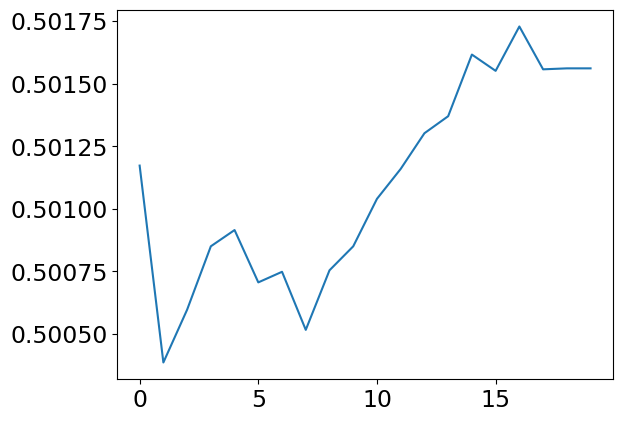

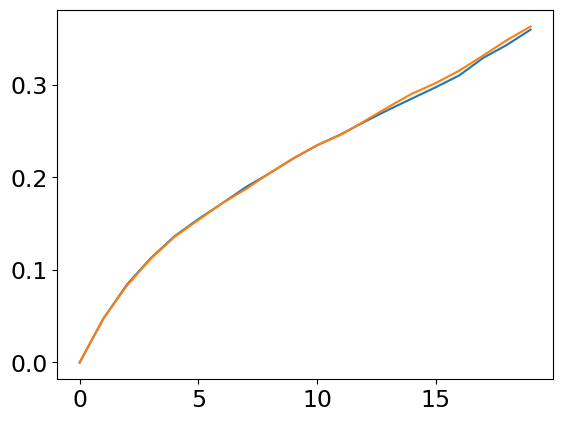

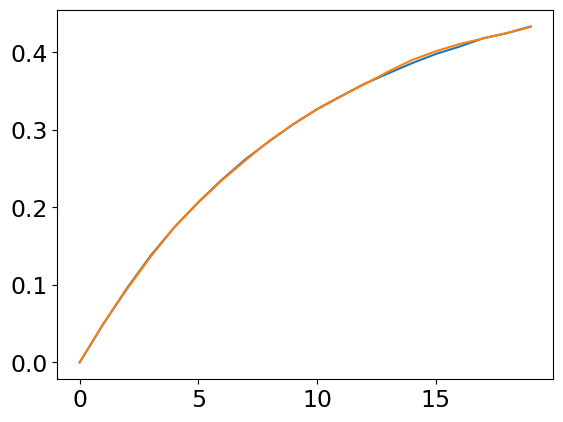

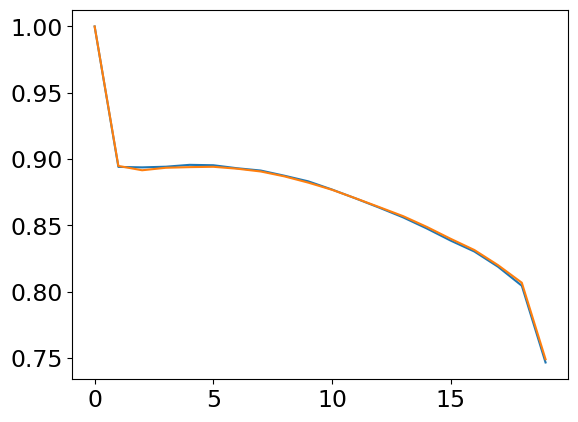

In [ ]:

# SIMULERING
nan = sim.couple
I = model.sim.couple<1
nan = np.zeros(I.shape)
nan[I] = np.nan

plt.plot(np.nanmean(sim.power+nan, axis=0))
plt.show()



plt.plot(np.nanmean(sim.Zm+nan, axis=0))
plt.plot(np.nanmean(sim.Zw+nan, axis=0))
plt.show()


plt.plot(np.nanmean(sim.Zm, axis=0))
plt.plot(np.nanmean(sim.Zw, axis=0))
plt.show()




plt.plot(np.nanmean(sim.labor_w, axis=0))
plt.plot(np.nanmean(sim.labor_m, axis=0))
plt.show()


In [ ]:
name = 'model_LC'
model_name = "model_LC"

N = 50000
rest_sample = False
#name_error = "uni2std_Yerror"

specs = {}
specs.update({f'model_LC_highsigma':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False, 'simN': N,  'threads':threads,'bargaining':1}}})
#specs.update({f'model_NC':{'latexname':'limited', 'par':{ 'T':T, 'do_HK': False,  'simN': N,  'threads':threads,'bargaining':2}}})
#specs.update({f'model_FC':{'latexname':'limited', 'par':{ 'T':T,  'do_HK': False, 'simN': N,  'threads':threads,'bargaining':0}}})

# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    
    # setup model
    model = LimitedCommitmentModelClass(name=name,par=spec['par'])
    model.spec = spec

    compile_now = True if do_compile & (m==0) else False
    model.link_to_cpp(force_compile=compile_now)
    

# setup model
#model = LimitedCommitmentModelClass(name=name)    
#model.link_to_cpp(force_compile=True)


#load par and sol
pickle_file = f'output/{name}_sol.pickle'

with open(pickle_file, 'rb') as f:
    model.sol = pickle.load(f)

pickle_file = f'output/{name}_par.pickle'

with open(pickle_file, 'rb') as f:
    model.par = pickle.load(f)
    model.par.simN = N


In [ ]:
model.simulate()
sim = model.sim
soml= model.sol
par = model.par


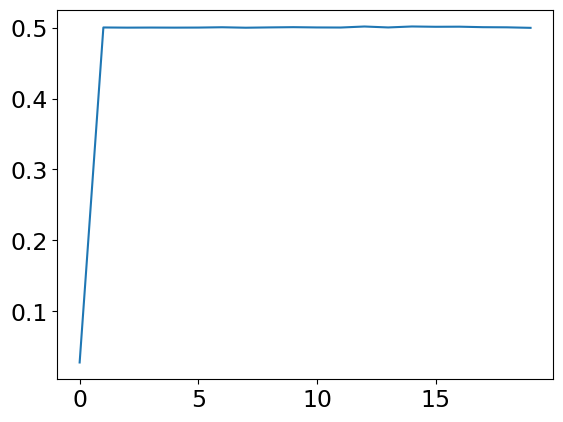

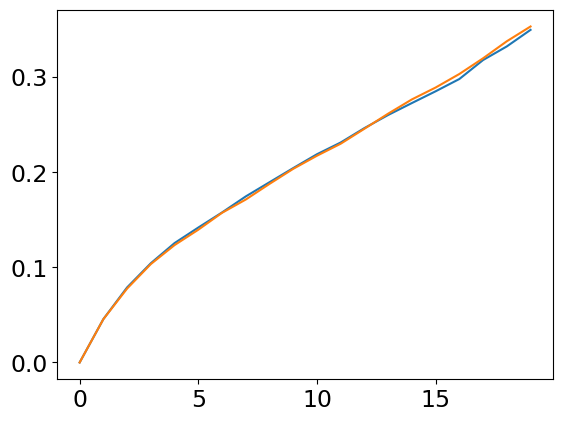

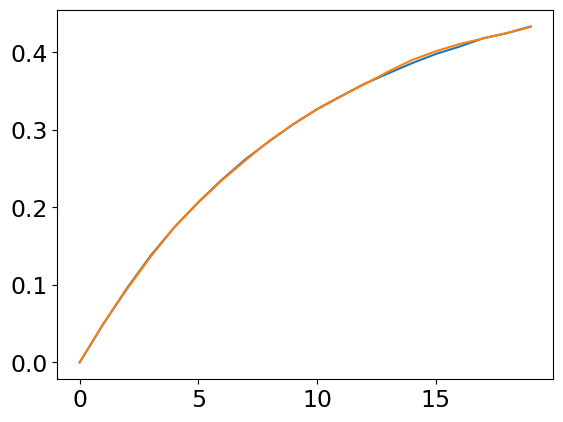

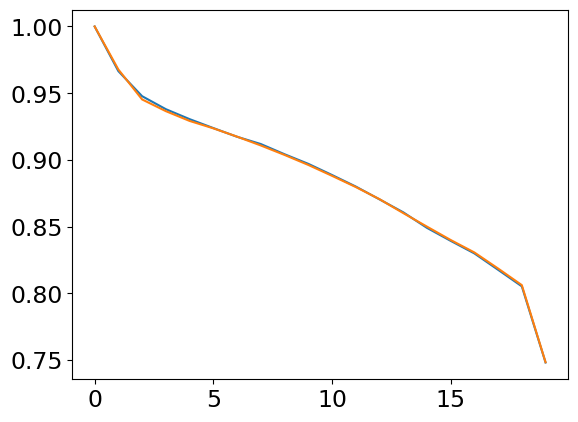

In [ ]:

# SIMULERING
nan = sim.couple
I = model.sim.couple<1
nan = np.zeros(I.shape)
nan[I] = np.nan

plt.plot(np.nanmean(sim.power+nan, axis=0))
plt.show()



plt.plot(np.nanmean(sim.Zm+nan, axis=0))
plt.plot(np.nanmean(sim.Zw+nan, axis=0))
plt.show()


plt.plot(np.nanmean(sim.Zm, axis=0))
plt.plot(np.nanmean(sim.Zw, axis=0))
plt.show()




plt.plot(np.nanmean(sim.labor_w, axis=0))
plt.plot(np.nanmean(sim.labor_m, axis=0))
plt.show()
